In [1]:
# python version 2.9.6
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import numpy as np
from config import api_key

In [2]:
# File to load
file_to_load = "NYPD_Motor_Vehicle_Collisions_-_Crashes.csv"

# Read csv file and store into Pandas data frame
data_raw = pd.read_csv(file_to_load)

/Users/abeljrenteria/miniconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Function that cleans the data
def clean_data(df, year):
    # Convert string date to Pandas DateTime type
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    # Keep only data from specified year
    df = df[(df['DATE'].dt.year == year)]
    
    # Sort data based on date
    df = df.sort_values(by='DATE', ascending=False)

    # Get rid of Null Rows in columns
    df = df.dropna(axis=0, subset=['ZIP CODE'])
    df = df.dropna(axis=0, subset=['LATITUDE'])
    df = df.dropna(axis=0, subset=['LONGITUDE'])
    df = df.dropna(axis=0, subset=['BOROUGH'])
    
    # Combine columns
    df['TOTAL PERSONS INJURED/KILLED'] = df["NUMBER OF PERSONS INJURED"] + df["NUMBER OF PERSONS KILLED"]
    df['TOTAL PEDESTRIANS INJURED/KILLED'] = df["NUMBER OF PEDESTRIANS INJURED"] + df["NUMBER OF PEDESTRIANS KILLED"]
    df['TOTAL CYCLIST INJURED/KILLED'] = df["NUMBER OF CYCLIST INJURED"] + df["NUMBER OF CYCLIST KILLED"]
    df['TOTAL MOTORIST INJURED/KILLED'] = df["NUMBER OF MOTORIST INJURED"] + df["NUMBER OF MOTORIST KILLED"]
     
    return df

In [4]:
data = clean_data(data_raw, 2018)

In [28]:
data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,UNIQUE ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS INJURED/KILLED,TOTAL PEDESTRIANS INJURED/KILLED,TOTAL CYCLIST INJURED/KILLED,TOTAL MOTORIST INJURED/KILLED
138319,2018-12-31,10:34,BROOKLYN,11209,40.623596,-74.02656,POINT (-74.02656 40.623596),NaN,NaN,449 84 STREET,...,4055463,Sedan,Sedan,NaN,NaN,NaN,0.0,0,0,0
138311,2018-12-31,2:15,BROOKLYN,11213,40.669674,-73.94708,POINT (-73.94708 40.669674),NaN,NaN,631 EASTERN PARKWAY,...,4055195,Sedan,Sedan,NaN,NaN,NaN,0.0,0,0,0
138314,2018-12-31,0:00,STATEN ISLAND,10305,40.593370,-74.08930,POINT (-74.0893 40.59337),SOUTH RAILROAD AVENUE,COOPER AVENUE,NaN,...,4055512,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0.0,0,0,0
138316,2018-12-31,14:00,BROOKLYN,11218,40.648468,-73.97837,POINT (-73.97837 40.648468),EAST 3 STREET,FORT HAMILTON PARKWAY,NaN,...,4055346,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0.0,0,0,0
138317,2018-12-31,19:00,QUEENS,11373,40.744550,-73.87378,POINT (-73.87378 40.74455),FORLEY STREET,LAMONT AVENUE,NaN,...,4055534,Sedan,Sedan,NaN,NaN,NaN,0.0,0,0,0


# Accidents at a glance
Create bar charts based on the following metrics
* Borough

In [6]:
# Count total number of accidents - 2018
total_accidents = len(data.index)

print(f'Total Accidents(2018): {total_accidents}')

Total Accidents(2018): 144735


In [7]:
# Total number of Persons Injured/Killed
total_inj_kill = data['TOTAL PERSONS INJURED/KILLED'].sum()
total_inj = data['NUMBER OF PERSONS INJURED'].sum()
total_kill = data['NUMBER OF PERSONS KILLED'].sum()

# Create a data frame to hold all values
total_inj_kill_analysis = {"Number of Persons Injured": int(total_inj), "Number of Persons Killed": int(total_kill),
                          "Total Persons Injured/Killed": int(total_inj_kill)}
total_inj_kill_analysis_df = pd.DataFrame([total_inj_kill_analysis])

# display dataframe
total_inj_kill_analysis_df

,Number of Persons Injured,Number of Persons Killed,Total Persons Injured/Killed
0,36266,134,36394


In [8]:
# Total number of pedestrians Injured/Killed
total_ped_inj_kill = data['TOTAL PEDESTRIANS INJURED/KILLED'].sum()
total_ped_inj = data['NUMBER OF PEDESTRIANS INJURED'].sum()
total_ped_kill = data['NUMBER OF PEDESTRIANS KILLED'].sum()


# Create a data frame to hold all values
total_ped_inj_kill_analysis = {"Number of Pedestrians Injured": int(total_ped_inj), "Number of Pedestrians Killed": int(total_ped_kill),
                          "Total Pedestrians Injured/Killed": int(total_ped_inj_kill)}
total_ped_inj_kill_analysis_df = pd.DataFrame([total_ped_inj_kill_analysis])

# display dataframe
total_ped_inj_kill_analysis_df

,Number of Pedestrians Injured,Number of Pedestrians Killed,Total Pedestrians Injured/Killed
0,8051,75,8126


In [9]:
# Total number of cyclists Injured/Killed
total_cycl_inj_kill = data['TOTAL CYCLIST INJURED/KILLED'].sum()
total_cycl_inj = data['NUMBER OF CYCLIST INJURED'].sum()
total_cycl_kill = data['NUMBER OF CYCLIST KILLED'].sum()

# Create a data frame to hold all values
total_cycl_inj_kill_analysis = {"Number of Cyclist Injured": int(total_cycl_inj), "Number of Cyclist Killed": int(total_cycl_kill),
                          "Total Cyclist Injured/Killed": int(total_cycl_inj_kill)}
total_cycl_inj_kill_analysis_df = pd.DataFrame([total_cycl_inj_kill_analysis])

# display dataframe
total_cycl_inj_kill_analysis_df

,Number of Cyclist Injured,Number of Cyclist Killed,Total Cyclist Injured/Killed
0,3331,5,3336


In [10]:
# Total number of motorists Injured/Killed
total_motor_inj_kill = data['TOTAL MOTORIST INJURED/KILLED'].sum()
total_motor_inj = data['NUMBER OF MOTORIST INJURED'].sum()
total_motor_kill = data['NUMBER OF MOTORIST KILLED'].sum()

# Create a data frame to hold all values
total_motor_inj_kill_analysis = {"Number of Motorist Injured": int(total_motor_inj), "Number of Motorist Killed": int(total_motor_kill),
                          "Total Motorist Injured/Killed": int(total_motor_inj_kill)}
total_motor_inj_kill_analysis_df = pd.DataFrame([total_motor_inj_kill_analysis])

# display dataframe
total_motor_inj_kill_analysis_df

,Number of Motorist Injured,Number of Motorist Killed,Total Motorist Injured/Killed
0,24874,53,24927


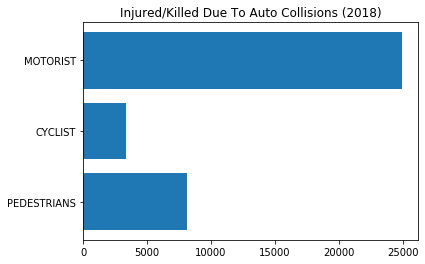

<Figure size 432x288 with 0 Axes>

In [26]:
# GRAPH FOR INJURED/KILLED ANALYSIS
# Dataset
types = ['PEDESTRIANS', 'CYCLIST', 'MOTORIST']
types_accidents = [total_ped_inj_kill, total_cycl_inj_kill, total_motor_inj_kill]
y_pos = np.arange(len(types_accidents))

# Create horizontal bars
plt.barh(y_pos, types_accidents)

# Create names on y-axis
plt.yticks(y_pos, types)
plt.title('Injured/Killed Due To Auto Collisions (2018)')

# Display Plot
plt.show()

# Output Plot
plt.savefig('PLOT_INJ_KILL_2018.png')

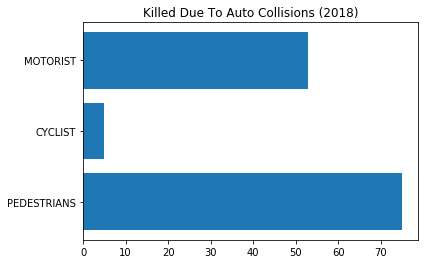

In [12]:
# GRAPH FOR KILLED ANALYSIS
# Dataset
types = ['PEDESTRIANS', 'CYCLIST', 'MOTORIST']
types_accidents = [total_ped_kill, total_cycl_kill, total_motor_kill]
y_pos = np.arange(len(types_accidents))

# Create horizontal bars
plt.barh(y_pos, types_accidents)

# Create names on y-axis
plt.yticks(y_pos, types)
plt.title('Killed Due To Auto Collisions (2018)')
plt.show()

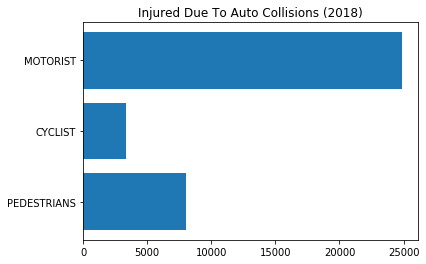

In [13]:
# GRAPH FOR INJURED ANALYSIS
# Dataset
types = ['PEDESTRIANS', 'CYCLIST', 'MOTORIST']
types_accidents = [total_ped_inj, total_cycl_inj, total_motor_inj]
y_pos = np.arange(len(types_accidents))

# Create horizontal bars
plt.barh(y_pos, types_accidents)

# Create names on y-axis
plt.yticks(y_pos, types)
plt.title('Injured Due To Auto Collisions (2018)')
plt.show()

# Most Popular Accident Locations

In [14]:
# Top 10 locations in New York City with the most accidents
groupby_df = (data.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME']
              .agg(['count']).sort_values(by='count', ascending=False).reset_index()
              .drop_duplicates('CROSS STREET NAME', keep='first'))
groupby_df.index += 1 
groupby_df.head(10)


,ON STREET NAME,CROSS STREET NAME,count
1,WEST 41 STREET,10 AVENUE,76
2,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,68
3,EAST HOUSTON STREET,BOWERY,61
4,NORTH CONDUIT AVENUE,COHANCY STREET,61
5,EAST GUN HILL ROAD,BRONX RIVER PARKWAY,60
6,2 AVENUE,EAST 59 STREET,57
7,EAST 37 STREET,3 AVENUE,57
8,WEST 40 STREET,11 AVENUE,55
9,TILLARY STREET,FLATBUSH AVENUE EXTENSION,53
10,82 STREET,23 AVENUE,52


# Heatmap

In [15]:
# Configure gmaps
gmaps.configure(api_key = api_key)

# extract location data and weights from dataframe
locations = data[['LATITUDE', 'LONGITUDE']]
total_person_weight = data['TOTAL PERSONS INJURED/KILLED']

In [16]:
# gmaps - heatmap
def drawHeatMap(location, val, zoom, intensity, radius):
    heatmap_layer = gmaps.heatmap_layer(locations, val + 3, dissipating = True)
    heatmap_layer.max_intensity = intensity
    heatmap_layer.point_radius = radius
    fig = gmaps.figure()
    fig = gmaps.figure(center = (40.7128, -74.0060), zoom_level=zoom)
    fig.add_layer(heatmap_layer)
    return fig

zoom = 10
intensity = 100
radius = 10

In [17]:
nyc_heatmap = drawHeatMap(locations, total_person_weight, zoom, intensity, radius)
nyc_heatmap

Figure(layout=FigureLayout(height='420px'))

# Analysis by Pedestrians, Cyclists, and Motorist

### Pedestrians 

In [18]:
# Pedestrians
data_pedestrians = data[data['TOTAL PEDESTRIANS INJURED/KILLED'] != 0]

# Most dangerous locations in New York City where pedestrians were injured/killed
group_ped = (data_pedestrians.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))
group_ped.index += 1 
group_ped.head(10)

,ON STREET NAME,CROSS STREET NAME,count
1,ATLANTIC AVENUE,LOGAN STREET,7
2,BROADWAY,CHAMBERS STREET,6
3,EAST 125 STREET,LEXINGTON AVENUE,6
4,FLATBUSH AVENUE,AVENUE H,5
5,108 STREET,63 DRIVE,5
6,WESTCHESTER AVENUE,JACKSON AVENUE,5
7,FLATBUSH AVENUE,AVENUE U,5
8,EAST 149 STREET,BERGEN AVENUE,4
9,3 AVENUE,EAST 42 STREET,4
10,NORTHERN BOULEVARD,UNION STREET,4


In [19]:
# Heatmap for pedestrians locations injured/killed
zoom = 10
intensity = 20
radius = 20
locations = data_pedestrians[['LATITUDE', 'LONGITUDE']]
total_pedestrians_weight = data_pedestrians['TOTAL PEDESTRIANS INJURED/KILLED']
pedestrians_heatmap = drawHeatMap(locations, total_pedestrians_weight, zoom, intensity, radius)
pedestrians_heatmap

Figure(layout=FigureLayout(height='420px'))

### Cyclist 

In [20]:
# Cyclist
data_cyclist = data[data['TOTAL CYCLIST INJURED/KILLED'] != 0]

# Most dangerous locations in New York City where cyclist were injured/killed
group_cyclist = (data_cyclist.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))
group_cyclist.index += 1 
group_cyclist.head(10)

,ON STREET NAME,CROSS STREET NAME,count
1,CHRYSTIE STREET,GRAND STREET,4
2,1 AVENUE,EAST 77 STREET,3
3,9 AVENUE,WEST 42 STREET,3
4,EAST 34 STREET,CHURCH AVENUE,3
5,34 AVENUE,103 STREET,3
6,WEST 29 STREET,8 AVENUE,3
7,GRAND STREET,CHRYSTIE STREET,3
8,DE KALB AVENUE,SOUTH PORTLAND AVENUE,3
9,CHAMBERS STREET,CHURCH STREET,3
10,EAST 86 STREET,1 AVENUE,3


In [21]:
# Heatmap for cyclist locations injured/killed
zoom = 10
intensity = 20
radius = 20
locations = data_cyclist[['LATITUDE', 'LONGITUDE']]
total_cyclist_weight = data_cyclist['TOTAL CYCLIST INJURED/KILLED']
cyclist_heatmap = drawHeatMap(locations, total_cyclist_weight, zoom, intensity, radius)
cyclist_heatmap

Figure(layout=FigureLayout(height='420px'))

### Motorist

In [22]:
# Motorist
data_motorist = data[data['TOTAL MOTORIST INJURED/KILLED'] != 0]

# Most dangerous locations in New York City where motorist were injured/killed
group_motorist = (data_motorist.groupby(['ON STREET NAME','CROSS STREET NAME'])['CROSS STREET NAME'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('CROSS STREET NAME', keep='first'))
group_motorist.index += 1 
group_motorist.head(10)

,ON STREET NAME,CROSS STREET NAME,count
1,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,19
2,ROCKAWAY BOULEVARD,FARMERS BOULEVARD,16
3,ROCKAWAY BOULEVARD,BREWER BOULEVARD,14
4,ATLANTIC AVENUE,LOGAN STREET,13
5,EASTERN PARKWAY,BUFFALO AVENUE,12
6,MAJOR DEEGAN EXPRESSWAY,WEST FORDHAM ROAD,10
7,NORTH CONDUIT AVENUE,LEFFERTS BOULEVARD,10
8,QUEENS BOULEVARD,SKILLMAN AVENUE,10
9,EAST GUN HILL ROAD,BRONX RIVER PARKWAY,10
10,PELHAM PARKWAY,SHORE ROAD,10


In [23]:
# Heatmap for motorist locations injured/killed
zoom = 10
intensity = 20
radius = 20
locations = data_motorist[['LATITUDE', 'LONGITUDE']]
total_motorist_weight = data_motorist['TOTAL MOTORIST INJURED/KILLED']
motorist_heatmap = drawHeatMap(locations, total_motorist_weight, zoom, intensity, radius)
motorist_heatmap

Figure(layout=FigureLayout(height='420px'))